# 5-2. Pie Chart


## 강의 소개

이번 시간에는 Pie Chart와 Pie Chart의 변형인 Donut Chart, Surburst Chart까지 알아보겠습니다.

각 차트들의 용도를 알아보고 어떻게 응용하면 좋을지 고민해보는 시간을 가져보아요 

## Further Reading

- [Pie Chart in Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie)
- [Multiple Pie Charts: Unreadable, Inefficient, and Over-Used](https://www.readcube.com/articles/10.3138%2Fjsp.46.3.05)
- 영상에서 언급된 바와 같이 Pie Chart는 사용을 지양해야 하는 경우가 많은데요, 이를 어떻게 대체할 수 있을까요? [다음 링크](https://blog.funnel.io/why-we-dont-use-pie-charts-and-some-tips-on-better-data-visualizations)에서 예제와 함께 간단하게 살펴봅시다.


In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1. Pie Chart & Bar Chart

### 1-1. Basic Pie Chart

- `pie()`

In [2]:
labels = ['A', 'B', 'C', 'D']
data = np.array([60, 90, 45, 165]) # total 360

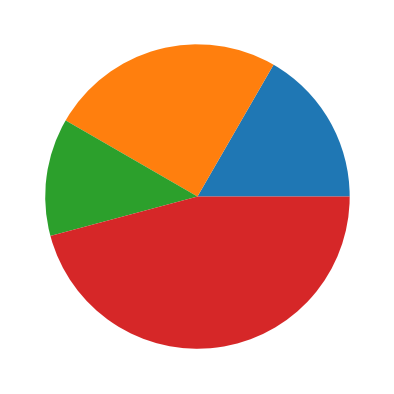

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.pie(data
       #,labels=labels # label 없이도 pie 차트를 그릴 수 있다.
      )
plt.show()

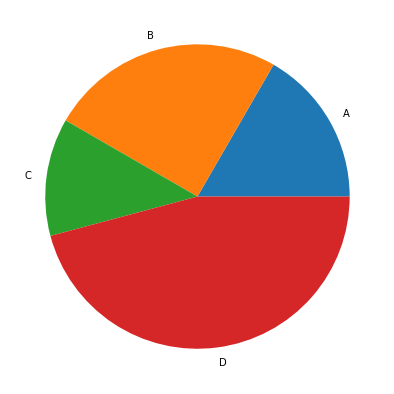

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.pie(data
       ,labels=labels # label 추가
      )
plt.show()

### 1-2. Pie Chart vs Bar Plot

같은 데이터로 Pie chart와 Bar Chart를 비교하며 장단점을 비교하면 다음과 같습니다.

- 장점 : 비율 정보에 대한 정보를 제공할 수 있다.
- 단점 : 구체적인 양의 비교가 어렵다.

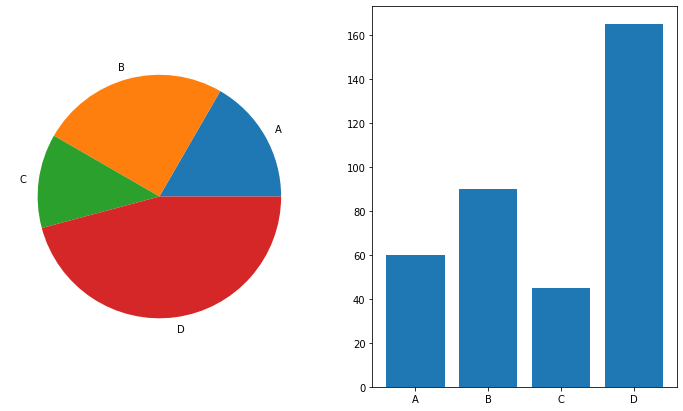

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

axes[0].pie(data, labels=labels)
axes[1].bar(labels, data)

plt.show()

차이가 큰 데이터에 대해서는 비교를 할 수 있지만, 다음과 같이 비슷한 값들에 대해서는 비교가 어렵습니다.

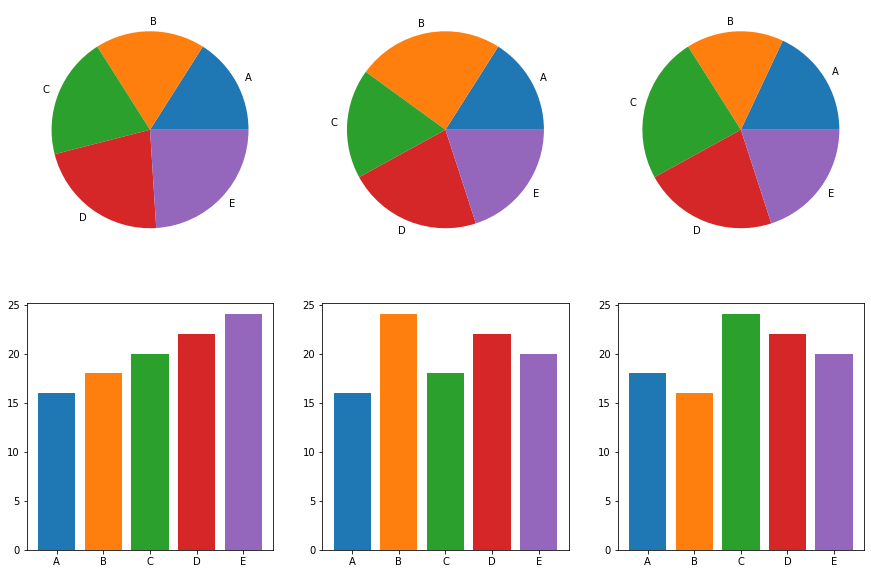

In [7]:
np.random.seed(97)

data = np.array([16, 18, 20, 22, 24])
labels = list('ABCDE')
color = plt.cm.get_cmap('tab10').colors[:5]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i in range(3):
    axes[0][i].pie(data, labels=labels)
    axes[1][i].bar(labels, data, color=color)
    np.random.shuffle(data)

plt.show()

### 1-2. Pie Chart Custom



In [8]:
labels = ['A', 'B', 'C', 'D']
data = np.array([60, 90, 45, 165]) # total 360

- `startangle`: 시작하는 각도 지정

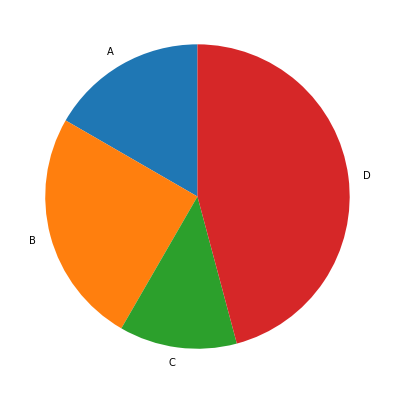

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.pie(data, labels=labels, 
        startangle=90 # 시작하는 지점을 90도로 설정
      )
plt.show()

- `explode`
  - 데이터 갯수와 같은 크기의 리스트로 값을 전달
  - 각 부채꼴 부분이 중심에서 얼만큼 떨어질지를 지정

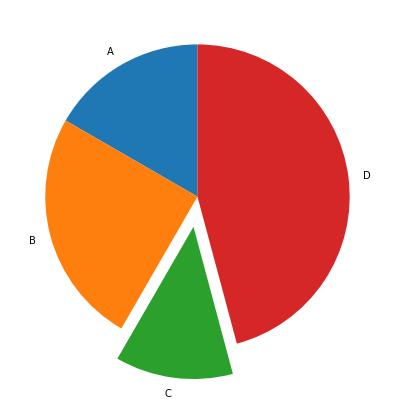

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
explode = [0, 0, 0.2, 0]

ax.pie(data, labels=labels, explode=explode, startangle=90)
plt.show()

- `shadow`
  - 그림자 표출 여부 지정


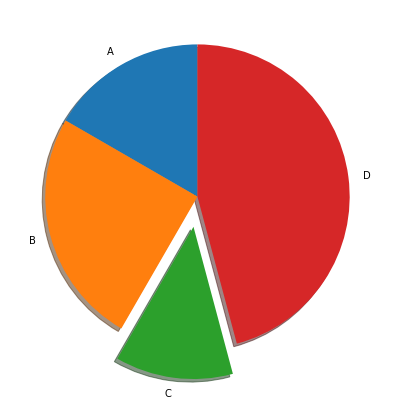

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
explode = [0, 0, 0.2, 0]

ax.pie(data, labels=labels, explode=explode, startangle=90,
      shadow=True)
plt.show()

- `autopct`
  - 각 부채꼴 부분의 비율값을 표시

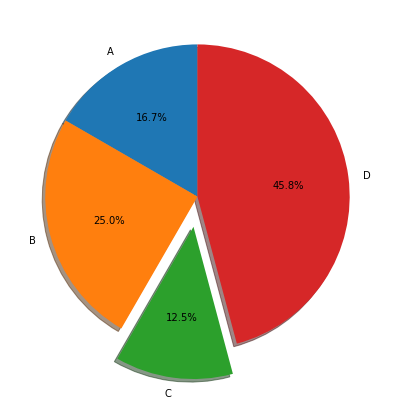

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
explode = [0, 0, 0.2, 0]

ax.pie(data, labels=labels, explode=explode, startangle=90,
      shadow=True, autopct='%1.1f%%')
plt.show()

- `labeldistance`
  - label과 파이차트 사이의 거리 지정


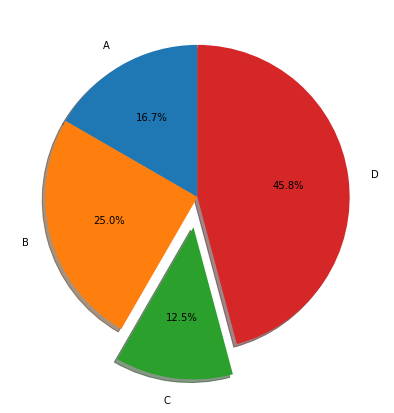

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
explode = [0, 0, 0.2, 0]

ax.pie(data, labels=labels, explode=explode, startangle=90,
      shadow=True, autopct='%1.1f%%',
      labeldistance=1.15
      )
plt.show()

- `rotatelabels`
  - label 회전 각도 지정

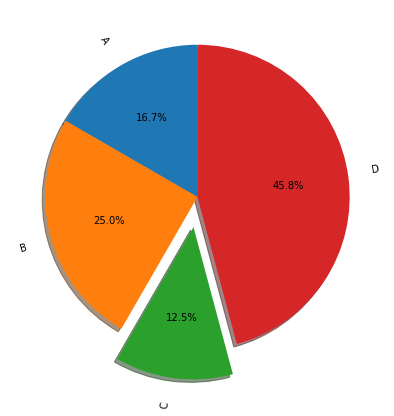

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
explode = [0, 0, 0.2, 0]

ax.pie(data, labels=labels, explode=explode, startangle=90,
      shadow=True, autopct='%1.1f%%',
      labeldistance=1.15,
        rotatelabels=90
      )
plt.show()

- `counterclock`
  - 파이를 그리는 기본 순서는 반시계 방향이다. (`counterclock=True`)
  - `counterclock=False`를 지정하여 파이차트를 시계방향으로 그릴 수 있다.

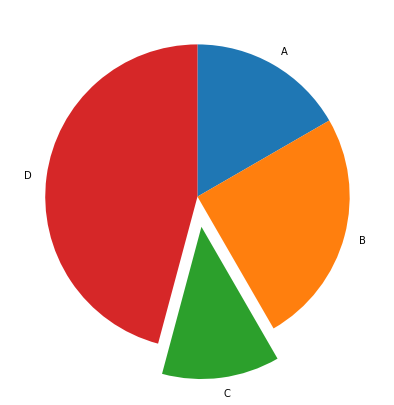

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
explode = [0, 0, 0.2, 0]

ax.pie(data, labels=labels, explode=explode, startangle=90, counterclock=False)
plt.show()

- `radius`
  - 원의 크기를 조절

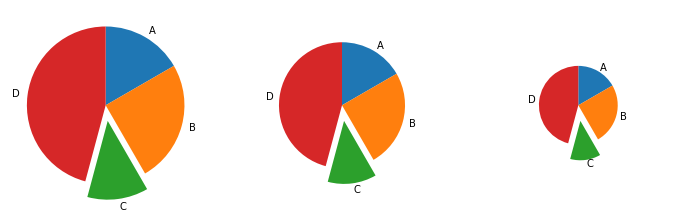

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(12, 7))
explode = [0, 0, 0.2, 0]

for size, ax in zip([1, 0.8, 0.5], axes):
    ax.pie(data, labels=labels, explode=explode, startangle=90, counterclock=False,
           radius=size
          )
plt.show()

## 2. Pie Chart 변형

### 2-1. Donut Chart 

중간에 흰색의 원을 그리는 방식으로 그려집니다.

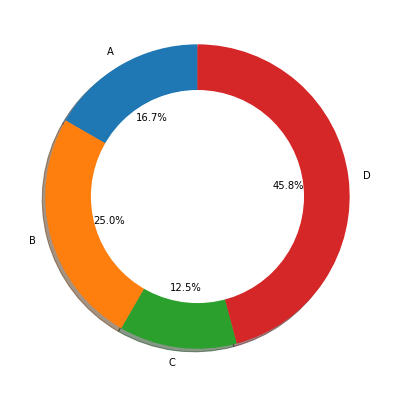

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))


ax.pie(data, labels=labels, startangle=90,
      shadow=True, autopct='%1.1f%%')

# 좌표 0, 0, r=0.7, facecolor='white'
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

plt.show()

- `pctdistance`: 비율 정보가 원의 중심에서 얼만큼 떨어질 지 지정
- `textprops`: 비율 정보 글씨 색깔 지정

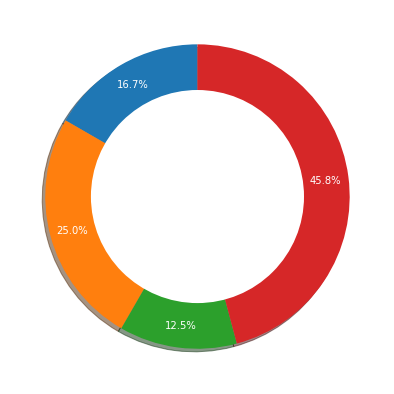

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))


ax.pie(data, labels=labels, startangle=90,
      shadow=True, autopct='%1.1f%%', pctdistance=0.85, textprops={'color':"w"})

# 좌표 0, 0, r=0.7, facecolor='white'
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

plt.show()